# Dataset Description
his dataset comprises of sales transactions captured at a retail store. The training dataset has 550,069 rows and 12 columns.


## Attributes:
| Column ID |         Column Name        | Data type |           Description           | 
|:---------:|:--------------------------:|:---------:|:-------------------------------:|
|     0     |           User_ID          |   int64   |      Unique Id of customer      | 
|     1     |         Product_ID         |   object  |       Unique Id of product      | 
|     2     |           Gender           |   object  |         Sex of customer         |
|     3     |             Age            |   object  |         Age of customer         | 
|     4     |         Occupation         |   int64   |   Occupation code of customer   | 
|     5     |        City_Category       |   object  |         City of customer        | 
|     6     | Stay_In_Current_City_Years |   object  | Number of years of stay in city | 
|     7     |       Marital_Status       |   int64   |    Marital status of customer   | 
|     8     |     Product_Category_1     |   int64   |       Category of product       | 
|     9     |     Product_Category_2     |  float64  |       Category of product       | 
|     10    |     Product_Category_3     |  float64  |       Category of product       | 
|     11    |          Purchase          |   int64   |         Purchase amount         | 

In [1]:
#Importing the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.feature_selection import SelectKBest , f_regression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy.stats import kstest
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Training Data
df_train = pd.read_csv('train.csv')

In [4]:
# Testing Data
df_test = pd.read_csv('test.csv')

In [5]:
df= df_train.append(df_test)

In [6]:
#Dataset 
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
df.shape

(783667, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
# Dataset Info  
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
#Checking the Duplicate rows in the Dataset
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool

# EDA

**Gender**

In [9]:
#Analyzing the Gender Column ( Category Column)
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

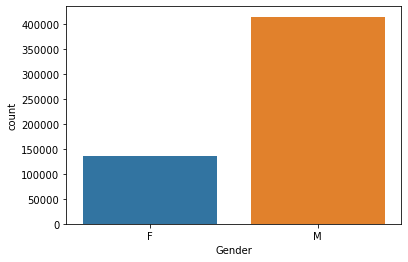

In [10]:
sns.countplot(data = df, x = 'Gender')


We have majority of males in dataset

**Insights**
* The Percentage of Female is 1/3 of the Total Population.

**Age**

In [11]:
#Analyzing the Age Feature
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

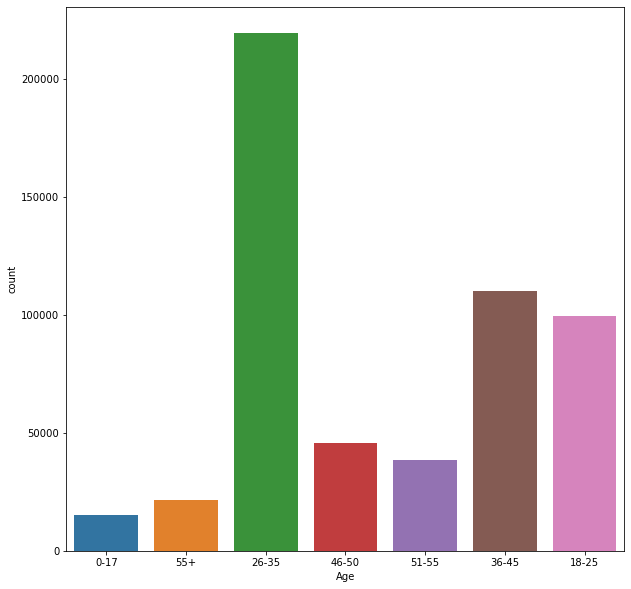

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(df['Age'])
plt.show()

**Insights**
* The Age ranging between 26-35 are the highest and age ranging between 0-17 have lowest numbers in dataset

**Occupation**

In [13]:
#Analyzing the Occupation Feature
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

Occcupation with code number 4 have highest numbers in dataset and 8 have lowest numbers

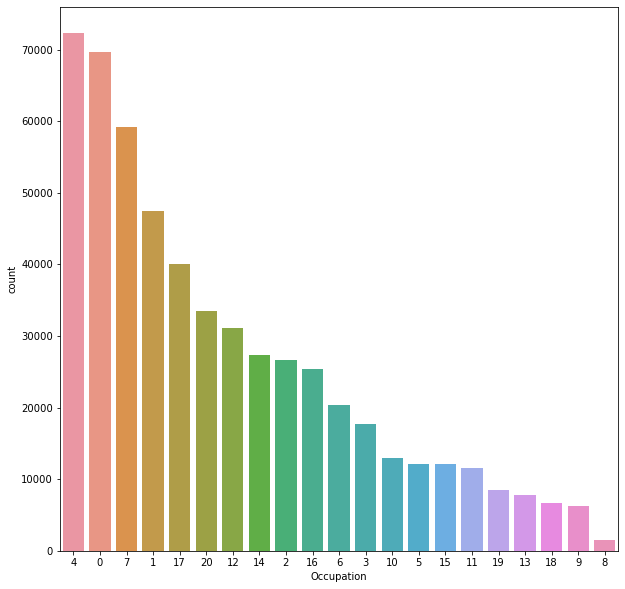

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(df['Occupation'],order=df['Occupation'].value_counts().index)
plt.show()

**Insights**
* The People having 8 occupation code are lowest in numbers.

**City Category**

In [15]:
#Analyzing the City_Category
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

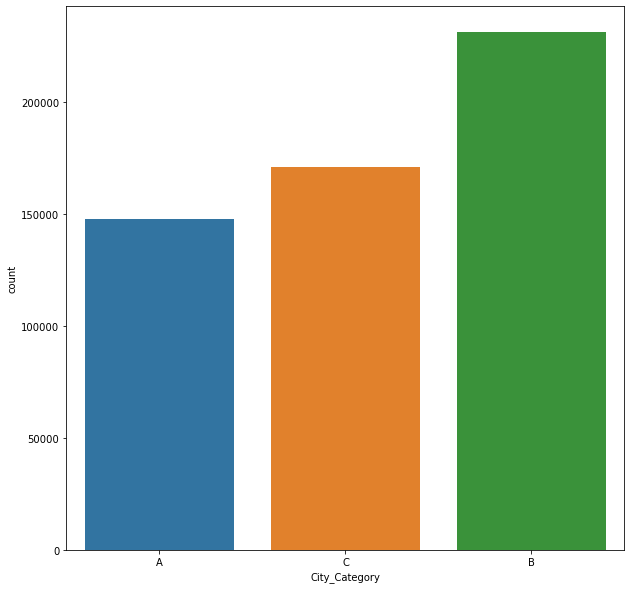

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(df['City_Category'])
plt.show()

**Insights**
* City Category B has highest value and A have lowest

**Stay In Current City Years**

In [17]:
#Analyzing the Stay In Current City Years
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

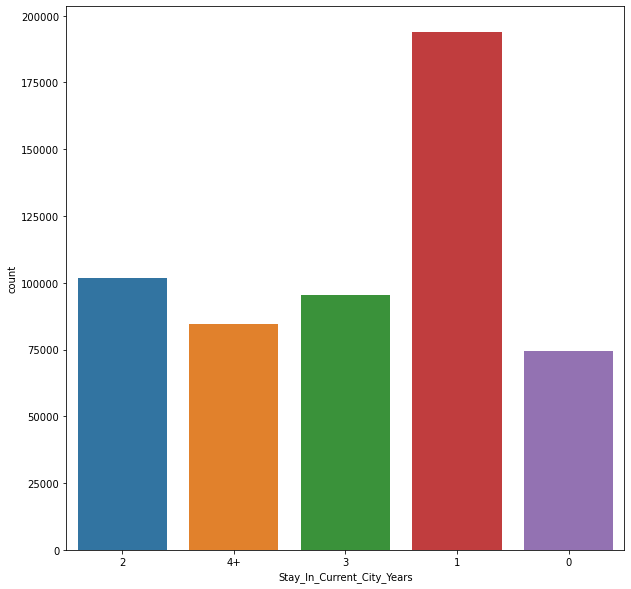

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(df['Stay_In_Current_City_Years'])
plt.show()

**Insights**
* Person who have stayed in for past 1 year has highest value and person who haven't stayed in city have lowest value

**Marital Status**

In [19]:
#Analyzing the Martial_Status
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

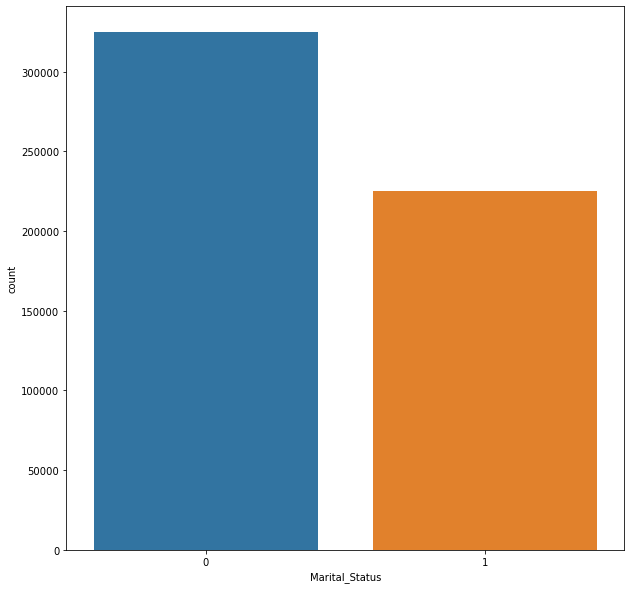

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(df['Marital_Status'])
plt.show()

**Insights**
* People without marriage has more numbers than people with marriage

**Product_Category_1**

In [21]:
#Analyzing the Product_Category_1
df['Product_Category_1'].value_counts().sort_index()

1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category_1, dtype: int64

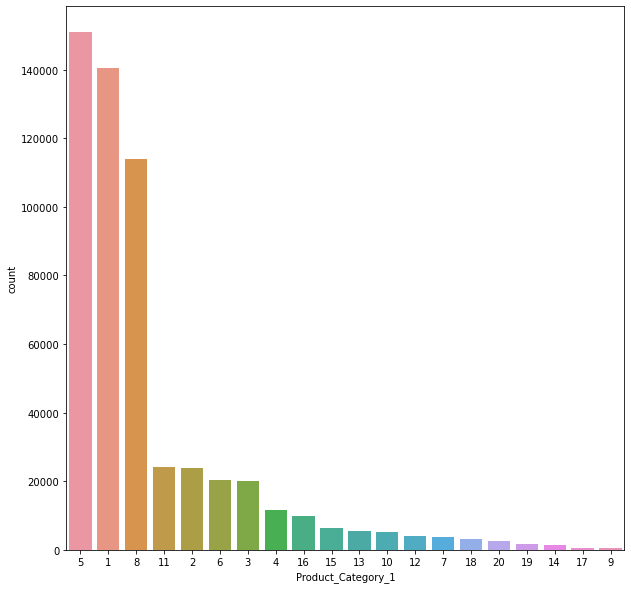

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(df['Product_Category_1'],order=df['Product_Category_1'].value_counts().index)
plt.show()

Product category 1 code 5 has highest numbers and 9 has lowest

**Product_Category_2**

In [23]:
#Analyzing the Product_Category_2
df['Product_Category_2'].value_counts().sort_index()

2.0     49217
3.0      2884
4.0     25677
5.0     26235
6.0     16466
7.0       626
8.0     64088
9.0      5693
10.0     3043
11.0    14134
12.0     5528
13.0    10531
14.0    55108
15.0    37855
16.0    43255
17.0    13320
18.0     2770
Name: Product_Category_2, dtype: int64

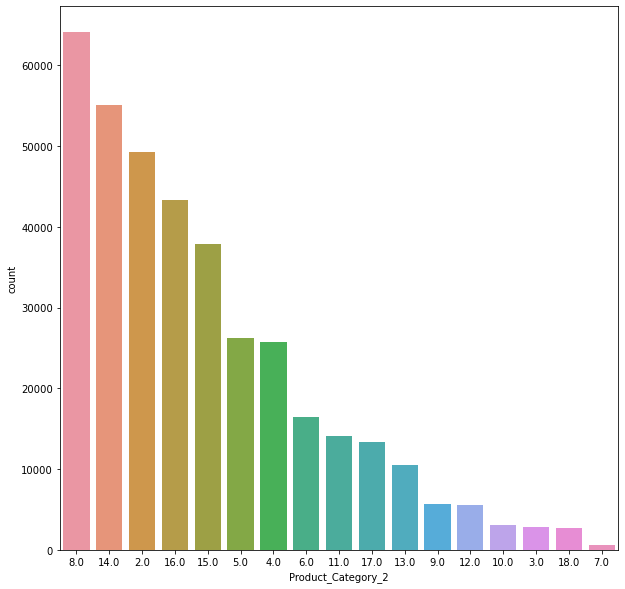

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(df['Product_Category_2'],order=df['Product_Category_2'].value_counts().index)
plt.show()

Product category 2 code 8 has highest numbers and 7 has lowest

**Product_Category_3**

In [25]:
#Analyzing the Product_Category_3
df['Product_Category_3'].value_counts().sort_index()

3.0       613
4.0      1875
5.0     16658
6.0      4890
8.0     12562
9.0     11579
10.0     1726
11.0     1805
12.0     9246
13.0     5459
14.0    18428
15.0    28013
16.0    32636
17.0    16702
18.0     4629
Name: Product_Category_3, dtype: int64

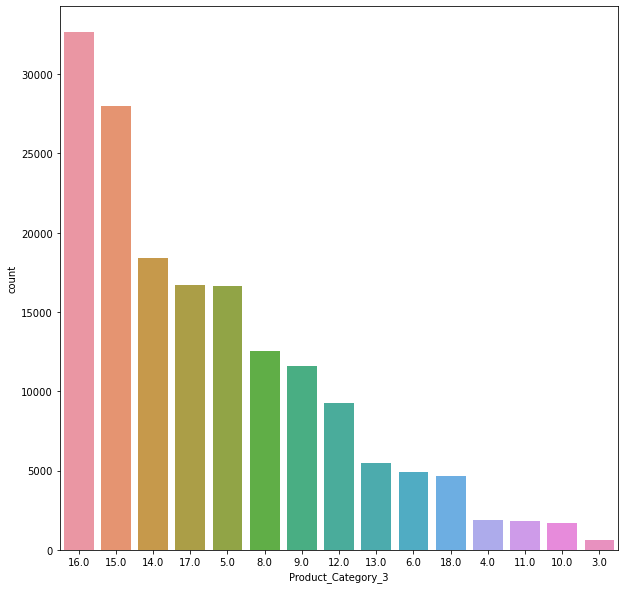

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(df['Product_Category_3'],order=df['Product_Category_3'].value_counts().index)
plt.show()

Product category 3 code 16 has highest numbers and 3 has lowest

**Purchase**

In [27]:
#Analyzing the Purchase Column
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

Highest purchase amount =23961/
Average purchase amount = 9263/
Minimum purchase amount = 12/

<AxesSubplot:xlabel='Purchase'>

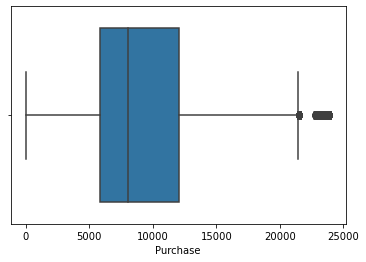

In [28]:
sns.boxplot(df['Purchase'])

Purchase column has outliers 

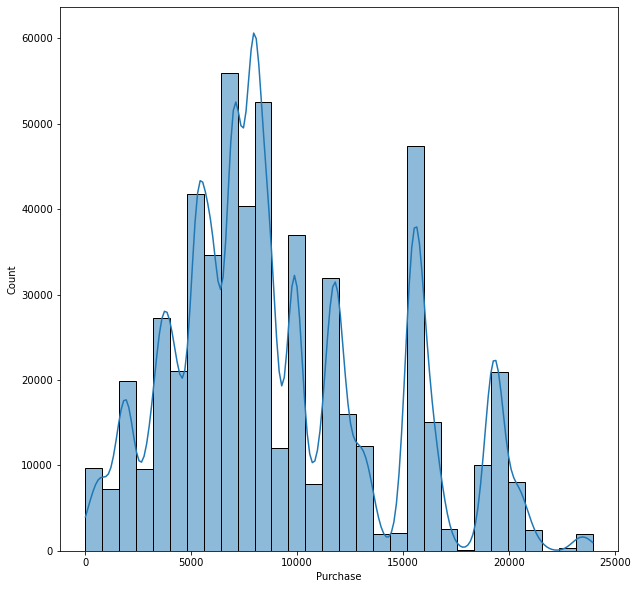

In [29]:
# Histogram plot(Purchase column has continuous value)
plt.figure(figsize=(10,10))
sns.histplot(df['Purchase'],kde=True,bins=30)
plt.show()

In [31]:
#perform Kolmogorov-Smirnov test for normality
kstest(df['Purchase'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

**Insights**
* The p-Value is 0.0. ( Does not follow normal distribution)
* It contains the Outliers.

**Bi-Variate Analysis**

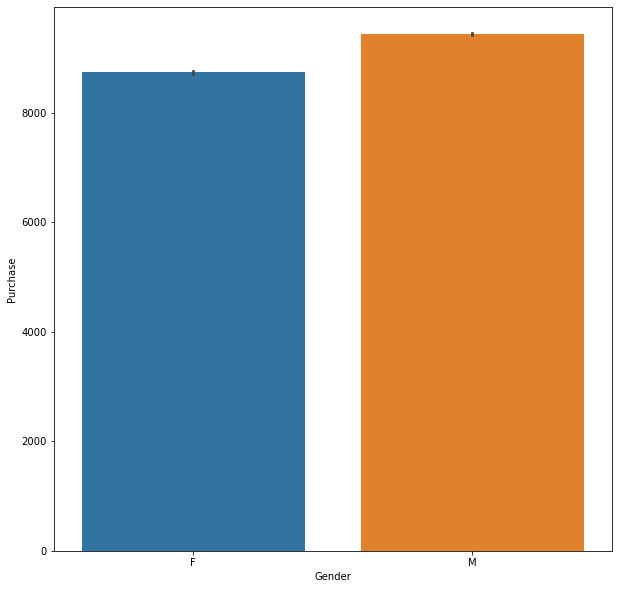

In [32]:
# Gender vs Purchase
plt.figure(figsize=(10,10))
sns.barplot(x=df['Gender'],y=df['Purchase'])
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

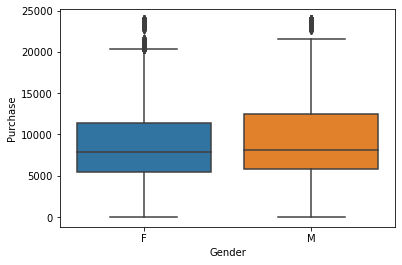

In [33]:
sns.boxplot(x=df['Gender'],y=df['Purchase'])

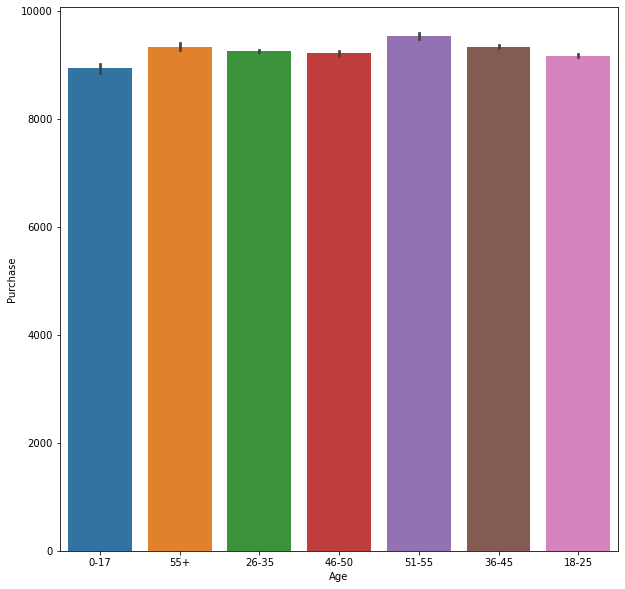

In [34]:
# Gender vs Age
plt.figure(figsize=(10,10))
sns.barplot(x=df['Age'],y=df['Purchase'])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

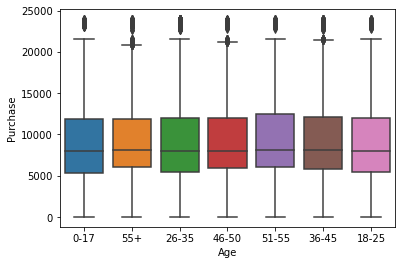

In [35]:
sns.boxplot(x=df['Age'],y=df['Purchase'])

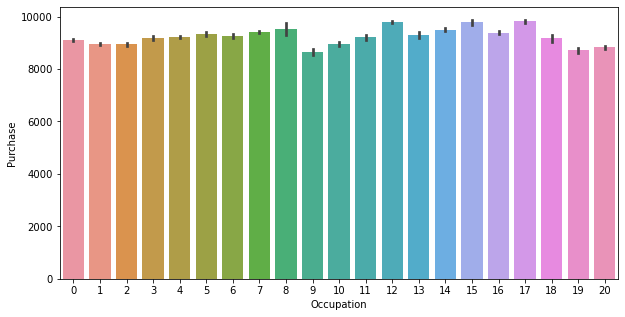

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Occupation'],y=df['Purchase'])
plt.show()

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

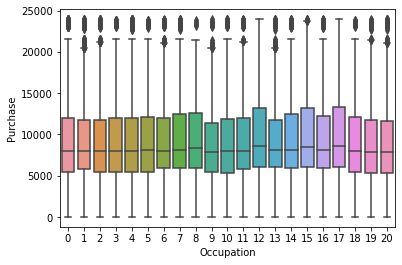

In [37]:
sns.boxplot(x='Occupation',y='Purchase',data=df)

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

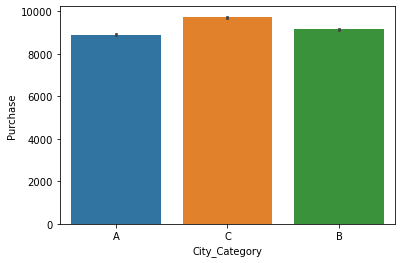

In [38]:
sns.barplot(x='City_Category',y='Purchase',data=df)

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

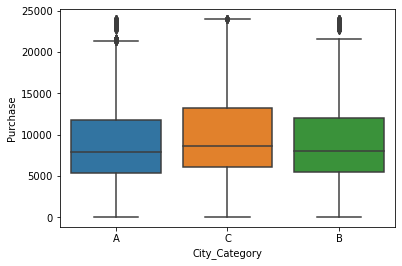

In [39]:
sns.boxplot(x='City_Category',y='Purchase',data=df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

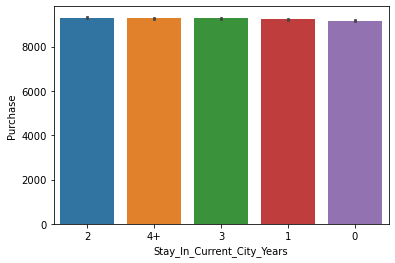

In [40]:
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',data=df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

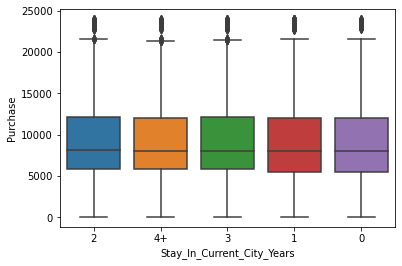

In [41]:
sns.boxplot(x='Stay_In_Current_City_Years',y='Purchase',data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

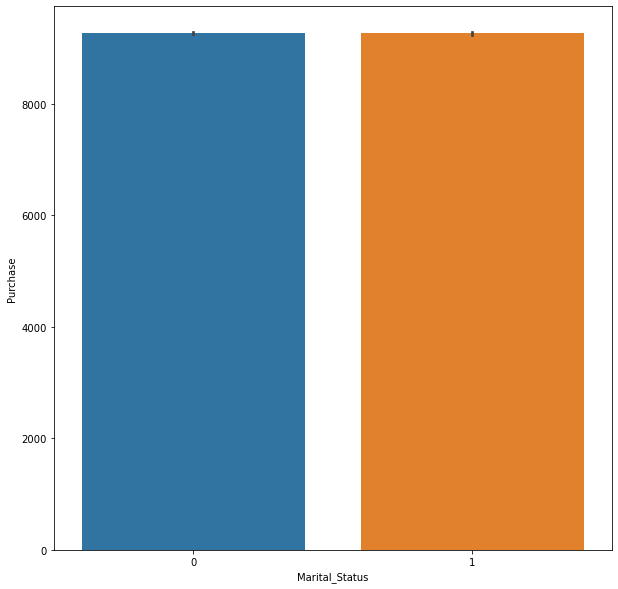

In [42]:
plt.figure(figsize=(10,10))
sns.barplot(x='Marital_Status',y='Purchase',data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

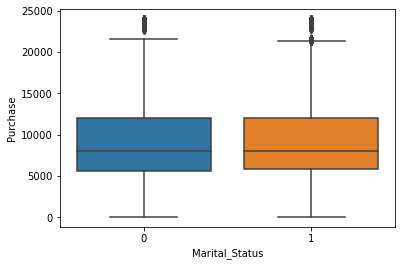

In [43]:
sns.boxplot(x=df['Marital_Status'],y=df['Purchase'])

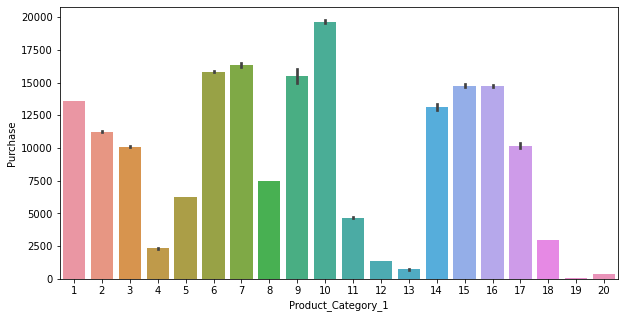

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Product_Category_1'],y=df['Purchase'])
plt.show()

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

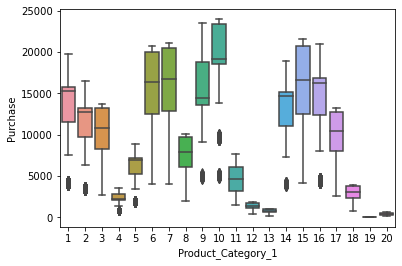

In [45]:
sns.boxplot(x=df['Product_Category_1'],y=df['Purchase'])

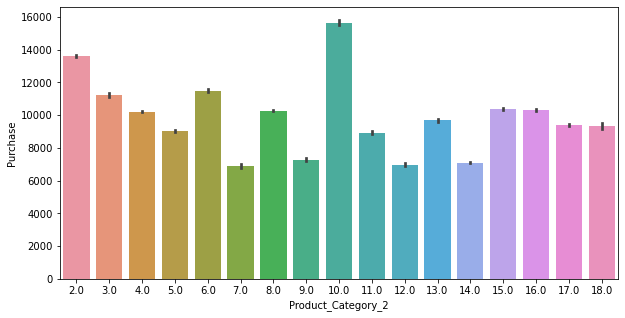

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Product_Category_2'],y=df['Purchase'])
plt.show()

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

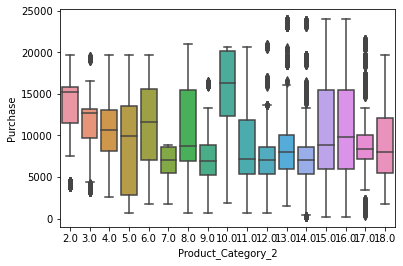

In [47]:
sns.boxplot(x=df['Product_Category_2'],y=df['Purchase'])

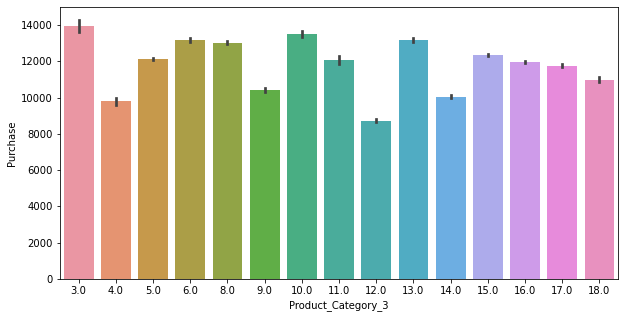

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Product_Category_3'],y=df['Purchase'])
plt.show()

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

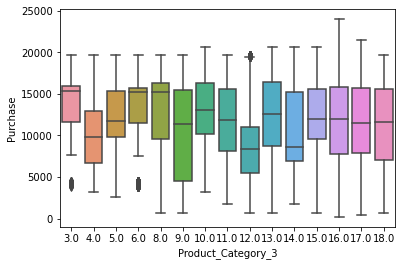

In [49]:
sns.boxplot(x=df['Product_Category_3'],y=df['Purchase'])

# Feature Engineering

In [8]:
# check for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [10]:
#Filling the Nan Values of Product_Category_2 and Product_Category_3 with Median

df['Product_Category_2'].fillna(df['Product_Category_2'].median(),inplace=True)

In [11]:
df['Product_Category_2'] = df['Product_Category_2'].astype(int)

In [12]:
df['Product_Category_3'].fillna(df['Product_Category_3'].median(),inplace=True)

In [13]:
df['Product_Category_2'] = df['Product_Category_2'].astype(int)

In [14]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [16]:
# Dropping the Columns
df = df.drop(columns=['User_ID','Product_ID'],axis=1)

**Categorical Values**

In [17]:
df['Age'] = LabelEncoder().fit_transform(df['Age'])

In [18]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [19]:
df['Stay_In_Current_City_Years'] = LabelEncoder().fit_transform(df['Stay_In_Current_City_Years'])

In [20]:
df['Stay_In_Current_City_Years'].value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [21]:
df['City_Category'] = LabelEncoder().fit_transform(df['City_Category'])

In [22]:
df['City_Category'].value_counts()

1    329739
2    243684
0    210244
Name: City_Category, dtype: int64

**We can remove prediction by removing outlier from output variable**

In [ ]:
# Removing outliers from target variable to improve prediction

quantile_1 = np.percentile(df['Purchase'],25,interpolation='midpoint')
quantile_3 = np.percentile(df['Purchase'],75,interpolation='midpoint')
IQR = quantile_3-quantile_1
maximum = q3 + 1.5*IQR
df = df[df['Purchase']<=maximum]

In [ ]:
sns.boxplot(df['Purchase'])

In [ ]:
# Correlation Matrix
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')


#  Splitting Data

In [23]:
train_data= df.loc[~(df['Purchase'].isnull())]

In [27]:
test_data= df.loc[~df['Purchase'].isnull(),:'Product_Category_3']


In [28]:
test_data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,9,14.0
1,0,0,10,0,2,0,1,6,14.0
2,0,0,10,0,2,0,12,9,14.0
3,0,0,10,0,2,0,12,14,14.0
4,1,6,16,2,4,0,8,9,14.0
...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,9,14.0
550064,0,2,1,2,3,0,20,9,14.0
550065,0,2,15,1,4,1,20,9,14.0
550066,0,6,1,2,2,0,20,9,14.0


In [29]:
X=train_data.drop("Purchase",axis=1)

y=train_data['Purchase']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)


# Model Training

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
# Random Forest
Random_Forest = RandomForestRegressor(n_estimators=500, n_jobs=-1)
Random_Forest.fit(X_train, y_train)
y_pred_rf = Random_Forest.predict(X_test)

In [ ]:
#Gradient Boosting
gradient_boosting=GradientBoostingRegressor()
#XgBoost
xg=XGBRegressor()

In [ ]:
gradient_boosting.fit(X_train,y_train)
g_predict= gradient_boosting.predict(X_test)

In [ ]:
xg.fit(X_train, y_train)
xg_predict= xg.predict(X_test)

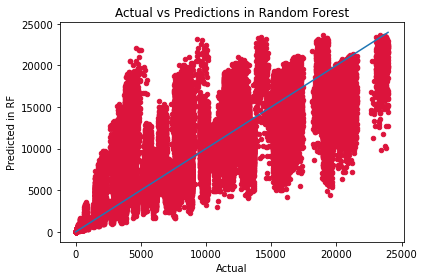

In [33]:
# Random Forest Predictions
plt.scatter(y_test, y_pred_rf, s=20, c='crimson')
plt.title('Actual vs Predictions')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

In [38]:
print("RMSE score for Random_Forest Regressor : ", np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("RMSE score for Gradient Boosting Regressor: ", np.sqrt(mean_squared_error(y_test,g_predict)))
print("RMSE score for XgBoosting Regressor: ", np.sqrt(mean_squared_error(y_test,xg_predict)))

RMSE score for Random_Forest Regressor :  3058.7968265353597
RMSE score for Gradient Boosting Regressor:  2994.599252833873
RMSE score for XgBoosting Regressor:  2888.646616372393


**XGBOOST has best RMSE and will train model for XG boost**

In [39]:
xg.fit(X, y)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [40]:
test_predict= xg.predict(test_data)
test_data['Purchase_pred']=test_predict

In [41]:
test_data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,9,14.0,10931.382812
1,0,0,10,0,2,0,1,6,14.0,13229.869141
2,0,0,10,0,2,0,12,9,14.0,1263.198853
3,0,0,10,0,2,0,12,14,14.0,1073.257568
4,1,6,16,2,4,0,8,9,14.0,7664.975098
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,9,14.0,125.419067
550064,0,2,1,2,3,0,20,9,14.0,-4.525047
550065,0,2,15,1,4,1,20,9,14.0,71.671219
550066,0,6,1,2,2,0,20,9,14.0,321.674255


Purchase distribution for the test data <seaborn.axisgrid.FacetGrid object at 0x000001B61E70EE80>


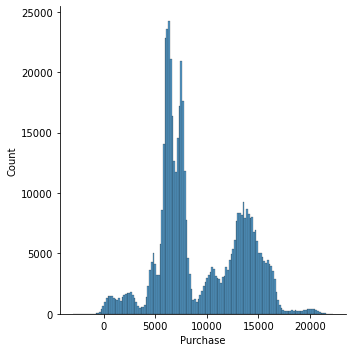

In [42]:
print("Test Cases Distribution", sns.displot(test_data['Purchase']))

In [44]:
test_data.to_csv("Results.csv")